# Exploratory analysis and fairness metrics

### Context

#### Where does your dataset come from? What is it for, how was it collected, etc.?

This dataset contains a collection of information regarding job applicants and their respective employability scores. This dataset has been gathered from various resources from job portals, career fairs, and online applications over a specific period of time. The dataset consists of a data from a variety of industries, positions, and qualifications. The dataset was made in an effort to assist organizations and recruiters in evaluating the suitability of candidates for various employment opportunities, providing insight into factors that influence employability and enhancing efficiency of hiring process. The dataset did undergo some preprocessing steps such as data cleaning, normalization, and feature engineering with outliers and missing values having been addressed. The author intends the dataset to be used for tasks such as predictive modeling, feature analysis, talent pool segmentation, and bias detection.
| Feature      | Description                                               |
| ------------ | --------------------------------------------------------- |
| Age          | age of the applicant, >35 years old or <35 years old      |
| EdLevel      | education level of the applicant                          |
| Gender       | gender of the applicant, (Man, Woman, or NonBinary)       |
| MainBranch   | whether the applicant is a profesional developer          |
| YearsCode    | how long the applicant has been coding                    |
| YearsCodePro | how long the applicant has been coding as a professional  |
| PrevSalary   | the applicant's previous job salary                       |
| CompSkills   | number of computer skills known by the applicant          |
| Employed     | target variable, whether the applicant has been hired     |

### Code

#### Report standard accuracy and fairness metrics of labels and predictions, such as those in Modules 1 and 2

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

data = pd.read_csv("job_applicant_data.csv")

In [3]:
data

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('job_applicant_data.csv')

# Drop irrelevant columns
data = data.drop(columns=['Unnamed: 0'])

# Create a new feature based on number of skills
data['NumTechWorkedWith'] = data['HaveWorkedWith'].str.count(';') + 1

# Drop HaveWorkedWith
data = data.drop(columns=['HaveWorkedWith'])

# Encode Gender:
gender_mapping = {'Man': 1, 'Woman': 0, 'NonBinary': 2}
inv_gender_mapping = {v: k for k, v in gender_mapping.items()}
data['Gender'] = data['Gender'].map(gender_mapping)

# Encode Age:
age_mapping = {'>35': 1, '<35' : 0}
inv_age_mapping =  {v: k for k, v in age_mapping.items()}
data['Age'] = data['Age'].map(age_mapping)

# Encode EdLevel:
ed_level_mapping = {'PhD': 4, 'Master' : 3, 'Undergraduate': 2, 'NoHigherEd': 1, 'Other': 0}
inv_ed_level_mapping  =  {v: k for k, v in ed_level_mapping.items()}
data['EdLevel'] = data['EdLevel'].map(ed_level_mapping)

# Encode categorical variables
label_encoders = {}
for column in ['Age', 'Accessibility', 'MentalHealth', 'MainBranch', 'Country']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le


# Split the data into features and target
X = data.drop(columns=['Employed'])
y = data['Employed']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 250, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=1,          # Run 10 iterations of the randomized search
    cv=5,               # Cross validation split of 5
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,          # Use all processors
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding cross validation accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 20}
Best Cross-Validation Accuracy: 0.7848185239191333


In [6]:
y_pred = random_search.best_estimator_.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def eval_model_performance(y_pred, y_test):
	tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
	precision = tp/(tp+fp)
	recall = tp/(tp+fn)
	f1_score = 2 * precision * recall / (precision + recall)
	mse = mean_squared_error(y_test, y_pred)
	mae = mean_absolute_error(y_test, y_pred)

	print(f"Precision Score: {precision:.4f}")
	print(f"Recall Score: {recall:.4f}")
	print(f"F1 Score: {f1_score:.4f}")
	print(f"Mean Squared Error (MSE): {mse:.4f}")
	print(f"Mean Absolute Error (MAE): {mae:.4f}")

eval_model_performance(y_pred=y_pred, y_test=y_test)

Precision Score: 0.7842
Recall Score: 0.8266
F1 Score: 0.8048
Mean Squared Error (MSE): 0.2147
Mean Absolute Error (MAE): 0.2147


In [8]:
def compute_demographic_parity(predictions, sensitive, group):
    idx = (sensitive == group)
    return np.mean(predictions[idx])

In [9]:
# Treating Age as the sensitive attribute
unique_Age_groups = data['Age'].unique()
unique_Age_groups.sort()

from collections import defaultdict
Age_counts = defaultdict(int)  
positive_label_counts = defaultdict(int) 

for Age, lbl in zip(X_test['Age'], y_test):  
    Age_counts[Age] += 1 
    if lbl == 1:
        positive_label_counts[Age] += 1  

# DEMOGRAPHIC PARITY / ACCURACY PARITY??? Slides have the same formula for both
demographic_parity = []
for i in unique_Age_groups:
    demographic_parity.append(positive_label_counts[i]/Age_counts[i])
    print(f"Demographic parity value of Age Group {inv_age_mapping[i]}: {demographic_parity[i]}")
print()


# p% rule
count_rule_violation = 0

for i in range(len(demographic_parity)):
    for j in range(i + 1, len(demographic_parity)):
        if demographic_parity[i] / demographic_parity[j] < 0.8:
            count_rule_violation += 1

print(f"Number of p% rule violations: {count_rule_violation}")

# PPV and NPV

negative_outcomes = defaultdict(int)
positive_outcomes = defaultdict(int)
negative_predn = defaultdict(int)
positive_predn = defaultdict(int)

for idx, label in enumerate(y_test):
    prediction = y_pred[idx]
    Age_group = X_test.iloc[idx]['Age']
    if prediction == label and label == 0:
        negative_outcomes[Age_group] += 1
    elif prediction == label and label == 1:
        positive_outcomes[Age_group] += 1
    if prediction == 0:
        negative_predn[Age_group] += 1
    elif prediction == 1:
        positive_predn[Age_group] += 1

print()

for group in positive_outcomes:
    if positive_predn[group] > 0:
        ratio = positive_outcomes[group] / positive_predn[group]
    print(f"Positive parity value of Age Group {inv_age_mapping[group]}: {ratio}")

print()

for group in negative_outcomes:
    if negative_predn[group] > 0:
        ratio = negative_outcomes[group] / negative_predn[group]
    print(f"Negative parity value of Age Group {inv_age_mapping[group]}: {ratio}")


# Equal Opportunity

positive_outcomes = defaultdict(int)
positive_label_for_Age_group = defaultdict(int)

for idx, label in enumerate(y_test):
    prediction = y_pred[idx]
    Age_group = X_test.iloc[idx]['Age']
    if prediction == 1 and label == 1:
        positive_outcomes[Age_group] += 1
    if label == 1:
        positive_label_for_Age_group[Age_group] += 1

print()
for group in positive_outcomes:
    ratio = positive_outcomes[group] / positive_label_for_Age_group[group]
    print(f"Equal opportunity value of Age Group {inv_age_mapping[group]}: {ratio}")

Demographic parity value of Age Group <35: 0.5456635318704284
Demographic parity value of Age Group >35: 0.5162990435291821

Number of p% rule violations: 0

Positive parity value of Age Group <35: 0.7895316804407714
Positive parity value of Age Group >35: 0.773876404494382

Negative parity value of Age Group >35: 0.8061538461538461
Negative parity value of Age Group <35: 0.7762424242424243

Equal opportunity value of Age Group <35: 0.8232477977786289
Equal opportunity value of Age Group >35: 0.8332703213610586


In [10]:
# Treating Gender as the sensitive attribute
unique_Gender_groups = data['Gender'].unique()
unique_Gender_groups.sort()

from collections import defaultdict
Gender_counts = defaultdict(int)  
positive_label_counts = defaultdict(int) 

for Gender, lbl in zip(X_test['Gender'], y_test):  
    Gender_counts[Gender] += 1 
    if lbl == 1:
        positive_label_counts[Gender] += 1  

# DEMOGRAPHIC PARITY / ACCURACY PARITY??? Slides have the same formula for both
demographic_parity = []
for i in unique_Gender_groups:
    demographic_parity.append(positive_label_counts[i]/Gender_counts[i])
    print(f"Demographic parity value of Gender Group {inv_gender_mapping[i]}: {demographic_parity[i]}")
print()


# p% rule
count_rule_violation = 0

for i in range(len(demographic_parity)):
    for j in range(i + 1, len(demographic_parity)):
        if demographic_parity[i] / demographic_parity[j] < 0.8:
            count_rule_violation += 1

print(f"Number of p% rule violations: {count_rule_violation}")

# PPV and NPV

negative_outcomes = defaultdict(int)
positive_outcomes = defaultdict(int)
negative_predn = defaultdict(int)
positive_predn = defaultdict(int)

for idx, label in enumerate(y_test):
    prediction = y_pred[idx]
    Gender_group = X_test.iloc[idx]['Gender']
    if prediction == label and label == 0:
        negative_outcomes[Gender_group] += 1
    elif prediction == label and label == 1:
        positive_outcomes[Gender_group] += 1
    if prediction == 0:
        negative_predn[Gender_group] += 1
    elif prediction == 1:
        positive_predn[Gender_group] += 1

print()

for group in positive_outcomes:
    if positive_predn[group] > 0:
        ratio = positive_outcomes[group] / positive_predn[group]
    print(f"Positive parity value of Gender Group {inv_gender_mapping[group]}: {ratio}")

print()

for group in negative_outcomes:
    if negative_predn[group] > 0:
        ratio = negative_outcomes[group] / negative_predn[group]
    print(f"Negative parity value of Gender Group {inv_gender_mapping[group]}: {ratio}")


# Equal Opportunity

positive_outcomes = defaultdict(int)
positive_label_for_Gender_group = defaultdict(int)

for idx, label in enumerate(y_test):
    prediction = y_pred[idx]
    Gender_group = X_test.iloc[idx]['Gender']
    if prediction == 1 and label == 1:
        positive_outcomes[Gender_group] += 1
    if label == 1:
        positive_label_for_Gender_group[Gender_group] += 1

print()
for group in positive_outcomes:
    ratio = positive_outcomes[group] / positive_label_for_Gender_group[group]
    print(f"Equal opportunity value of Gender Group {inv_gender_mapping[group]}: {ratio}")

Demographic parity value of Gender Group Woman: 0.47017045454545453
Demographic parity value of Gender Group Man: 0.5401326820733396
Demographic parity value of Gender Group NonBinary: 0.46691176470588236

Number of p% rule violations: 0

Positive parity value of Gender Group Man: 0.7860345932094811
Positive parity value of Gender Group Woman: 0.7781155015197568
Positive parity value of Gender Group NonBinary: 0.7044025157232704

Negative parity value of Gender Group Man: 0.7845060893098782
Negative parity value of Gender Group Woman: 0.8
Negative parity value of Gender Group NonBinary: 0.8672566371681416

Equal opportunity value of Gender Group Man: 0.8280469699014712
Equal opportunity value of Gender Group Woman: 0.7734138972809668
Equal opportunity value of Gender Group NonBinary: 0.8818897637795275


In [11]:
# Treating EdLevel as the sensitive attribute
unique_EdLevel_groups = data['EdLevel'].unique()
unique_EdLevel_groups.sort()

from collections import defaultdict
EdLevel_counts = defaultdict(int)  
positive_label_counts = defaultdict(int) 

print(unique_EdLevel_groups)

for EdLevel, lbl in zip(X_test['EdLevel'], y_test):  
    EdLevel_counts[EdLevel] += 1 
    if lbl == 1:
        positive_label_counts[EdLevel] += 1  

# DEMOGRAPHIC PARITY / ACCURACY PARITY??? Slides have the same formula for both
demographic_parity = []
for i in unique_EdLevel_groups:
    demographic_parity.append(positive_label_counts[i]/EdLevel_counts[i])
    print(f"Demographic parity value of EdLevel Group {inv_ed_level_mapping[i]}: {demographic_parity[i]}")
print()

# p% rule
count_rule_violation = 0

for i in range(len(demographic_parity)):
    for j in range(i + 1, len(demographic_parity)):
        if demographic_parity[i] / demographic_parity[j] < 0.8:
            count_rule_violation += 1

print(f"Number of p% rule violations: {count_rule_violation}")

# PPV and NPV

negative_outcomes = defaultdict(int)
positive_outcomes = defaultdict(int)
negative_predn = defaultdict(int)
positive_predn = defaultdict(int)

for idx, label in enumerate(y_test):
    prediction = y_pred[idx]
    EdLevel_group = X_test.iloc[idx]['EdLevel']
    if prediction == label and label == 0:
        negative_outcomes[EdLevel_group] += 1
    elif prediction == label and label == 1:
        positive_outcomes[EdLevel_group] += 1
    if prediction == 0:
        negative_predn[EdLevel_group] += 1
    elif prediction == 1:
        positive_predn[EdLevel_group] += 1

print()

for group in positive_outcomes:
    if positive_predn[group] > 0:
        ratio = positive_outcomes[group] / positive_predn[group]
    print(f"Positive parity value of EdLevel Group {inv_ed_level_mapping[group]}: {ratio}")

print()

for group in negative_outcomes:
    if negative_predn[group] > 0:
        ratio = negative_outcomes[group] / negative_predn[group]
    print(f"Negative parity value of EdLevel Group {inv_ed_level_mapping[group]}: {ratio}")


# Equal Opportunity

positive_outcomes = defaultdict(int)
positive_label_for_EdLevel_group = defaultdict(int)

for idx, label in enumerate(y_test):
    prediction = y_pred[idx]
    EdLevel_group = X_test.iloc[idx]['EdLevel']
    if prediction == 1 and label == 1:
        positive_outcomes[EdLevel_group] += 1
    if label == 1:
        positive_label_for_EdLevel_group[EdLevel_group] += 1

print()
for group in positive_outcomes:
    ratio = positive_outcomes[group] / positive_label_for_EdLevel_group[group]
    print(f"Equal opportunity value of EdLevel Group {inv_ed_level_mapping[group]}: {ratio}")

[0 1 2 3 4]
Demographic parity value of EdLevel Group Other: 0.5884526558891455
Demographic parity value of EdLevel Group NoHigherEd: 0.5876577840112202
Demographic parity value of EdLevel Group Undergraduate: 0.5591497227356746
Demographic parity value of EdLevel Group Master: 0.47965274009766684
Demographic parity value of EdLevel Group PhD: 0.3081081081081081

Number of p% rule violations: 0

Positive parity value of EdLevel Group Undergraduate: 0.7864316000892658
Positive parity value of EdLevel Group Other: 0.7892857142857143
Positive parity value of EdLevel Group Master: 0.7732970027247956
Positive parity value of EdLevel Group NoHigherEd: 0.8
Positive parity value of EdLevel Group PhD: 0.7551020408163265

Negative parity value of EdLevel Group NoHigherEd: 0.734982332155477
Negative parity value of EdLevel Group Undergraduate: 0.7701260911736179
Negative parity value of EdLevel Group Master: 0.8114532685035116
Negative parity value of EdLevel Group PhD: 0.8529411764705882
Negativ

### Discussion

#### Discuss which fairness metrics are specifically relevant to your task, e.g. accuracy parity might be less appropriate for recidivism prediction than demographic parity (etc.)

**Demographic Parity**

The likelihood of a positive outcome should be the same regardless of whether
the person is in the protected group

$$P(\hat{Y} = hired | z_i = female) = P(\hat{Y} = hired | z_i = male) = P(\hat{Y} = hired | z_i = nonbinary)$$

We decided not to use this metric since it does not factor in the label, it only uses the prediction and the sensitive
attribute. 

**P% rule**

Disparity is sometimes measured using a quantity known as the p-% rule
which measures ratio between the probability of being assigned to the positive
class for the advantaged versus disadvantaged group.

A p% rule violation is defined as follows

$$\frac{P(\hat{Y} = hired | z_i = gender_1)}{P(\hat{Y} = hired | z_i = gender_2)} > \frac{P}{100}$$

We decided not to use this metric for the following reasons:
1. Our dataset did not exhibit violations of the p% rule
2. This metric does not take into account the labels ie. $Y$

**Positive Predictive Value Parity and Negative Predictive Value Parity**

Positive predictive value parity states that the chance of a positive label should be
equalized across groups given a positive prediction 

$$PPV: P(y= hired | \hat{y}_i= hired, z_i= female) = P(y= hired | \hat{y}_i= hired, z_i= male) = P(y=hired | \hat{y}_i= hired, z_i=nonbinary)$$

Negative predictive value parity states that the chance of a negative label should be
equalized across groups given a negative prediction 

$$NPV: P(y=\text{not hired} | \hat{y}_i=\text{not hired}, z_i=\text{female}) = P(y=\text{not hired} | \hat{y}_i=\text{not hired}, z_i=\text{male}) = P(y=\text{not hired} | \hat{y}_i=\text{not hired}, z_i=\text{nonbinary})$$


The PPV and NVP essentially say - people predicted as qualified, should actually be qualified

Although this is what companies would want in the real world, this metric more more focused on the employers
needs and not making sure that the employees you apply are treated fairly.

**Equal Opportunity**

The probability of a person in a positive class being assigned a positive outcome
should be equal for both the protected and unprotected groups

$$P(\hat{Y}= hired | z_i= female, y_i= hired) = P(\hat{Y}=hired | z_i= male, y_i= hired) = = P(\hat{Y}=hired | z_i= nonbinary, y_i= hired)$$

The equal opportunity metric is effectively the true positive rate (TPR).
It essentially means - qualified people should be predicted as qualified

This is what we want for our task! If a candidate is qualified, the model should predict that they are
qualified, regardless of what sensitive attributes like gender, age, etc.


# Interventions

In [12]:
def get_gender_equal_opportunity(y_pred, y_test):
		
	positive_outcomes = defaultdict(int)
	positive_label_for_Gender_group = defaultdict(int)

	for idx, label in enumerate(y_test):
		prediction = y_pred[idx]
		Gender_group = X_test.iloc[idx]['Gender']
		if prediction == 1 and label == 1:
			positive_outcomes[Gender_group] += 1
		if label == 1:
			positive_label_for_Gender_group[Gender_group] += 1

	print()
	for group in positive_outcomes:
		ratio = positive_outcomes[group] / positive_label_for_Gender_group[group]
		print(f"Equal opportunity value of Gender Group {inv_gender_mapping[group]}: {ratio}")

### Code

#### How much can “unfairness” in your predictions be explained by dataset characteristics? Can you fix them with dataset-based interventions?

TODO: Write about it here

In [57]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from collections import defaultdict

random_search.fit(X_train, y_train)
decision_scores = random_search.predict_proba(X_train)[:, 1]

misclassified_negatives = []  
misclassified_positives = [] 

for i in range(len(decision_scores)):
    predicted_label = 1 if decision_scores[i] >= 0.5 else 0
    actual_label = y_train.iloc[i]
    gender = X_train.iloc[i]['Gender']
    if predicted_label != actual_label:
        if actual_label == 1 and predicted_label == 0:
            misclassified_negatives.append((i, decision_scores[i], gender))
        elif actual_label == 0 and predicted_label == 1:
            misclassified_positives.append((i, decision_scores[i], gender)) 

misclassified_negatives.sort(key=lambda x: x[1], reverse=True) 
misclassified_positives.sort(key=lambda x: x[1]) 
 
misclassified_negatives_0 = [entry for entry in misclassified_negatives if entry[2] == 0]    
misclassified_negatives_1 = [entry for entry in misclassified_negatives if entry[2] == 1]    
misclassified_positives_0 = [entry for entry in misclassified_positives if entry[2] == 0]    
misclassified_positives_1 = [entry for entry in misclassified_positives if entry[2] == 1]    

# Optimized flip counts based on perf on training data
flip_count_0 = 300 
flip_count_1 = 2500 

flipped_negative_indices = {entry[0] for entry in misclassified_negatives_0[:flip_count_0]} | \
                           {entry[0] for entry in misclassified_negatives_1[:flip_count_1]}
flipped_positive_indices = {entry[0] for entry in misclassified_positives_0[:flip_count_0]} | \
                           {entry[0] for entry in misclassified_positives_1[:flip_count_1]}

# Create a new training label series and flip the selected labels.
new_y_train = y_train.copy()

valid_indices_to_flip = new_y_train.index.intersection(flipped_negative_indices | flipped_positive_indices)
new_y_train.loc[valid_indices_to_flip] = 1 - new_y_train.loc[valid_indices_to_flip] 

random_search.fit(X_train, new_y_train) 
y_pred_test = random_search.predict(X_test)

# evaluated metrics
x = eval_model_performance(y_pred=y_pred_test, y_test=y_test)
y = get_gender_equal_opportunity(y_pred_test, y_test)

print(x)
print(y)

Precision Score: 0.7821
Recall Score: 0.8292
F1 Score: 0.8050
Mean Squared Error (MSE): 0.2151
Mean Absolute Error (MAE): 0.2151

Equal opportunity value of Gender Group Man: 0.8310163314887299
Equal opportunity value of Gender Group Woman: 0.7824773413897281
Equal opportunity value of Gender Group NonBinary: 0.84251968503937
None
None


### Code

#### How do different modeling choices impact fairness characteristics? Can you fix them with in-processing interventions?

#### Instance reweighting

In [14]:
X_train_without_gender = X_train.drop('Gender', axis=1, inplace=False)
X_test_without_gender = X_test.drop('Gender', axis=1, inplace=False)

In [15]:
# Code it out here
weights = {}

gender_index = data.columns.get_loc("Gender")

# Iterate over sensitive attribute:
for s in inv_gender_mapping:
    # Iterate over output class: 0 (not employed), 1 (employed)
    for c in [0, 1]:
        num = (sum(x['Gender'] == s for i, x in X_train.iterrows()) * sum(y == c for y in y_train)) 
        den = (len(X_train) * sum(x['Gender'] == s and y == c for ((i, x), y) in zip(X_train.iterrows(), y_train)))
        weights[(s, c)] = num / den

In [16]:
sample_weights = []
for ((i, x), y) in zip(X_train.iterrows(), y_train):
    w = weights[(x['Gender'], y)]
    sample_weights.append(w)

In [17]:
model = RandomForestClassifier()
model.fit(X_train_without_gender, y_train, sample_weight=sample_weights)

RandomForestClassifier()

In [18]:
y_pred_after_inprocessing = model.predict(X_test_without_gender)

In [19]:
eval_model_performance(y_pred_after_inprocessing, y_test)

Precision Score: 0.7784
Recall Score: 0.8082
F1 Score: 0.7930
Mean Squared Error (MSE): 0.2259
Mean Absolute Error (MAE): 0.2259


In [20]:
get_gender_equal_opportunity(y_pred_after_inprocessing, y_test)


Equal opportunity value of Gender Group Man: 0.8088810905655284
Equal opportunity value of Gender Group Woman: 0.770392749244713
Equal opportunity value of Gender Group NonBinary: 0.8661417322834646


#### Separate models for each group + majority voting

In [21]:
# Dataset with rows associated with Gender = "Man"
X_man = X_train[X_train['Gender'] == 1].drop('Gender', axis=1, inplace=False)
y_man = y_train[X_train['Gender'] == 1]

# Dataset with rows associated with Gender = "Woman"
X_woman = X_train[X_train['Gender'] == 0].drop('Gender', axis=1, inplace=False)
y_woman = y_train[X_train['Gender'] == 0]

# Dataset with rows associated with Gender = "NonBinary"
X_nonbinary = X_train[X_train['Gender'] == 2].drop('Gender', axis=1, inplace=False)
y_nonbinary = y_train[X_train['Gender'] == 2]

In [22]:
# Train separate models for each Gender group
model_man = random_search.best_estimator_.fit(X_man, y_man)
model_woman = random_search.best_estimator_.fit(X_woman, y_woman)
model_nonbinary = random_search.best_estimator_.fit(X_nonbinary, y_nonbinary)

In [23]:
pred_man = model_man.predict(X_test_without_gender)
pred_woman = model_woman.predict(X_test_without_gender)
pred_nonbinary = model_nonbinary.predict(X_test_without_gender)

majority_vote_pred = []
for i in range(len(X_test)):
    decision = [pred_man[i], pred_woman[i], pred_nonbinary[i]]
    
	# It at least two of the models vote for acceptance, then accept
    majority_vote_pred.append(sum(decision) >= 2)

majority_vote_pred = np.array(majority_vote_pred)

In [24]:
eval_model_performance(majority_vote_pred, y_test)

Precision Score: 0.7658
Recall Score: 0.8585
F1 Score: 0.8095
Mean Squared Error (MSE): 0.2163
Mean Absolute Error (MAE): 0.2163


In [25]:
get_gender_equal_opportunity(majority_vote_pred, y_test)


Equal opportunity value of Gender Group Man: 0.859495208530166
Equal opportunity value of Gender Group Woman: 0.8338368580060423
Equal opportunity value of Gender Group NonBinary: 0.8661417322834646


### Code

#### Can you apply post-processing interventions to achieve desired fairness outcomes?

TODO: Write about it here

In [26]:
model = random_search.best_estimator_
model.fit(X_train_without_gender, y_train)
y_scores = [x[1] for x in model.predict_proba(X_test_without_gender)]

In [27]:
threshold_woman = 0.46
threshold_man = 0.5
threshold_nonbinary = 0.55

predictions = []
Gender_group_arr = np.array(X_test["Gender"])
counts = np.bincount(Gender_group_arr.astype(int))

for score,group_num in zip(y_scores, Gender_group_arr):
    if group_num == 0:
        if score > threshold_woman: predictions.append(1)
        else: predictions.append(0)
    if group_num == 1:
        if score > threshold_man: predictions.append(1)
        else: predictions.append(0)
    if group_num == 2:
        if score > threshold_nonbinary: predictions.append(1)
        else: predictions.append(0)

In [28]:
eval_model_performance(predictions, y_test)

Precision Score: 0.7840
Recall Score: 0.8280
F1 Score: 0.8054
Mean Squared Error (MSE): 0.2143
Mean Absolute Error (MAE): 0.2143


In [29]:
get_gender_equal_opportunity(predictions, y_test)


Equal opportunity value of Gender Group Man: 0.8280469699014712
Equal opportunity value of Gender Group Woman: 0.8277945619335347
Equal opportunity value of Gender Group NonBinary: 0.8267716535433071


### Discussion

#### What types of interventions are most appropriate for your task (e.g. legal, practical to deploy, etc.)? What are the tradeoffs between them (e.g. how are other metrics negatively impacted by a particular intervention, etc.)

Analysis of Preprocessing Interventions:
The postprocessing interventions proved to be very effective in improving equal opportunity between all 3 groups: man, woman, and non-binary. Previously, we noticed that there was a greater disparity between gender groups for equal opportunity, with the gap between the lowest and highest gender group(i.e. woman and non-binary), is around 11%. The goal of data pre-processing is to identify the misclassified negatives and misclassified positives and flip them depedning on a certain threshold. Upon performing flipping of misclassified labels based on a threshold pre-determined using training data, we obtain an improvement in equal opportunity, with a difference between the lowest and highest gender group now being 6%, thereby implying an approximate 50% reduction in equal opportunity gap between various gender groups.

Analysis of In-Processing Interventions:
The in-processing interventions involved a mix of instance reweighting followed by group-specific modelling. The first approach assigns sample weights based on gender and employment status, training a single Random Forest Classifier that balances underrepresented groups. The second approach splits the dataset by gender, training separate models for men, women, and non-binary individuals, ensuring decision boundaries for sub-groups. Combined, these methods significantly helped promote a reduced discrimination between different gender categories, as the difference between the lowest and highest gender group was reduced to approximately 3% from an 11% gap!

Analysis of Postprocessing Interventions:
The postprocessing interventions proved to be very effective in improving equal opportunity between all 3 groups: man, woman, and non-binary. Prior to the intervention, we see that there is biases within each group and also limited data for some groups compared to others. To improve the Equal Opportunity value of each of the gender groups, we predicted the probabilities of each of the test cases and specifically extracted the probability that their employability score was close to 1. We then manipulated the threshold scores for each to get a nearly equivalent equal opportunity value. Some of the consequences of postprocesisng intervention: this intervention may reduce overall model accuracy because thresholds are no longer purely data-driven but adjusted to enforce fairness. Increasing and decreasing the threshold could also affect the False Positive rate which affects the efficacy of the model as well. By modifying decision thresholds separately for different gender groups, it introduces complexity and inconsistency in decision-making.

### 8. Context: Summarize the main contributions of the paper and its relevance to your task. 
Research Paper: "Achieving Fairness with Decision Trees: An Adversarial Approach"

The paper introduces an innovative adversarial debiasing approach that integrates a neural network into a gradient boosting framework for decision trees. It formulates a min–max optimization where the predictor minimizes both the prediction error and the sensitive information leakage while an adversary attempts to recover the sensitive attribute. By incorporating the adversary’s gradient into the boosting residuals, the method guides the model to "hide" sensitive details, thereby reducing bias. The paper tested this method on popular datasets such as the Adult UCI income dataset, the Default credit dataset, and the Bank marketing dataset, and found that it significantly improved fairness metrics like demographic parity while maintaining high accuracy. This framework is highly relevant to my task as it provides a systematic way to reduce gender bias in hiring predictions by directly embedding fairness into the model training process.

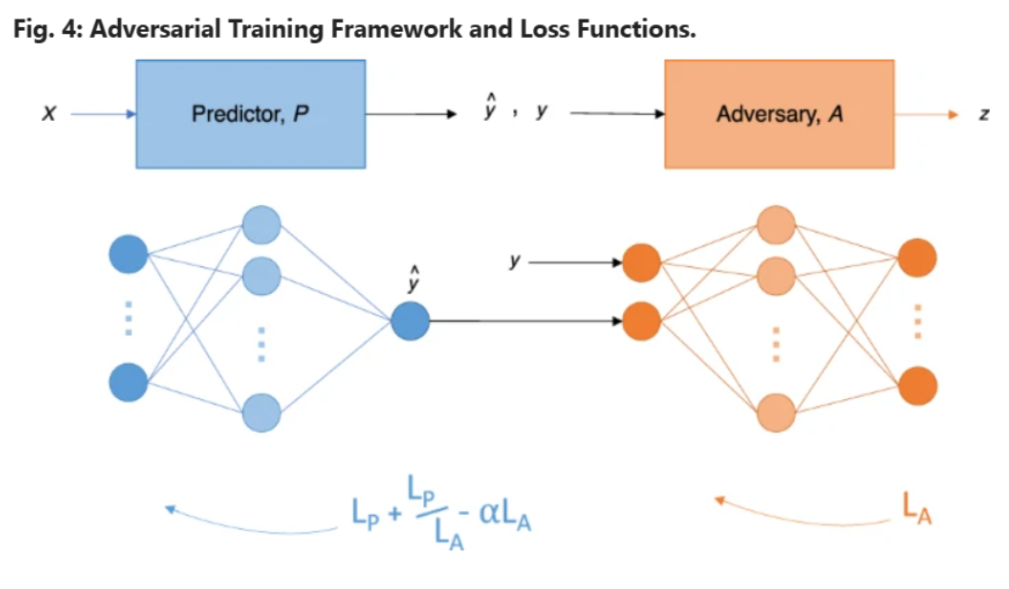

### 9. Code: Attempt to reproduce results similar to those reported in the paper on your dataset (or comment in detail about any failure to do so) 

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

X = data.drop(columns=['Employed'])
y = data['Employed']
S_attr = data['Gender']

X_train, X_test, y_train, y_test, S_train, S_test = train_test_split(
    X, y, S_attr, test_size=0.2, random_state=42
)
X_train_W_Gender = X_train.copy()
X_test_W_Gender = X_test.copy()
# Remove Gender from training features
# X_train = X_train.drop(columns=['Gender'])
# X_test = X_test.drop(columns=['Gender'])
X_train_W_Gender = X_train_W_Gender.drop(columns=['Gender'])
X_test_W_Gender = X_test_W_Gender.drop(columns=['Gender'])

X_train_np = X_train_W_Gender.values
X_test_np = X_test_W_Gender.values
y_train = y_train.values.astype(float)
y_test = y_test.values.astype(float)
n_train = len(y_train)
n_test = len(y_test)

# Initialize predictor F as a constant function
p_mean = np.mean(y_train)
F_train = np.full(n_train, np.log(p_mean / (1 - p_mean)))
F_test  = np.full(n_test,  np.log(p_mean / (1 - p_mean)))

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the adversary network (a fully connec5ed neural network)
class Adversary(nn.Module):
    def __init__(self):
        super(Adversary, self).__init__()
        self.fc1 = nn.Linear(1, 16)   # Input: predictor's output 
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 3)    # Output: 3 classes (0,1,2)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

In [33]:
adv_model = Adversary()
adv_optimizer = optim.Adam(adv_model.parameters(), lr=0.01)
adv_criterion = nn.CrossEntropyLoss()

# Parameters for binning the combined residual u
num_bins = 10  

# Boosting loop with adversarial correction (min–max formulation) using RandomForestClassifier as learner
lambda_fairness = 0.015  # Trade-off parameter
M = 50                   
alpha = 1.0              # Step size for each iteration

In [34]:
for m in range(M):
    # Compute current predicted probabilities using the sigmoid function
    p_pred = sigmoid(F_train)
    # Calclate residuals for loss: r = y - p_pred
    r = y_train - p_pred

    # Compute adversary gradient
    F_tensor = torch.tensor(F_train.reshape(-1, 1), dtype=torch.float32, requires_grad=True) # tensors needed for Adversial
    p_tensor = torch.sigmoid(F_tensor)
    adv_logits = adv_model(p_tensor)
    s_tensor = torch.tensor(S_train.values, dtype=torch.long)
    adv_loss = adv_criterion(adv_logits, s_tensor)
    adv_loss.backward()
    t = F_tensor.grad.detach().numpy().flatten()

    # Combine the gradients: u = r - lambda_fairness * t
    u = r - lambda_fairness * t

    # Using RandomForestClassifier as learner 
    bin_edges = np.linspace(np.min(u), np.max(u), num_bins+1)
    u_bins = np.digitize(u, bin_edges) - 1
    # For regression approximation, we take the midpoint of each bin as the representative value.
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2.0

    # Train a RandomForestClassifier to predict the bin index from X_train_np
    rf_weak = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
    rf_weak.fit(X_train_np, u_bins)
    # Predict bin indices for training and test sets.
    u_bins_pred_train = rf_weak.predict(X_train_np)
    u_bins_pred_test = rf_weak.predict(X_test_np)
    # Convert predicted bin indices to continuous values using the midpoints.
    h_train = np.array([bin_midpoints[i] for i in u_bins_pred_train])
    h_test = np.array([bin_midpoints[i] for i in u_bins_pred_test])

    # Update the predictor F by adding the  learner prediction
    F_train = F_train + alpha * h_train
    F_test  = F_test  + alpha * h_test

    # Update the adversary network using the new predictor outputs
    F_tensor_new = torch.tensor(F_train.reshape(-1, 1), dtype=torch.float32)
    p_tensor_new = torch.sigmoid(F_tensor_new)
    adv_logits_new = adv_model(p_tensor_new)
    adv_loss_new = adv_criterion(adv_logits_new, s_tensor)
    adv_optimizer.zero_grad()
    adv_loss_new.backward()
    adv_optimizer.step()

    # compute and print the predictor loss on the training set
    pred_loss = -np.mean(y_train * np.log(p_pred + 1e-8) + (1 - y_train) * np.log(1 - p_pred + 1e-8))
    print(f"Iteration {m}: Predictor Loss = {pred_loss:.4f}, Adversary Loss = {adv_loss_new.item():.4f}")

Iteration 0: Predictor Loss = 0.6905, Adversary Loss = 1.2029
Iteration 1: Predictor Loss = 0.5892, Adversary Loss = 1.1538
Iteration 2: Predictor Loss = 0.5367, Adversary Loss = 1.1086
Iteration 3: Predictor Loss = 0.5218, Adversary Loss = 1.0669
Iteration 4: Predictor Loss = 0.5239, Adversary Loss = 1.0311
Iteration 5: Predictor Loss = 0.5350, Adversary Loss = 0.9995
Iteration 6: Predictor Loss = 0.5407, Adversary Loss = 0.9736
Iteration 7: Predictor Loss = 0.5473, Adversary Loss = 0.9501
Iteration 8: Predictor Loss = 0.5549, Adversary Loss = 0.9261
Iteration 9: Predictor Loss = 0.5634, Adversary Loss = 0.9022
Iteration 10: Predictor Loss = 0.5727, Adversary Loss = 0.8773
Iteration 11: Predictor Loss = 0.5830, Adversary Loss = 0.8513
Iteration 12: Predictor Loss = 0.5940, Adversary Loss = 0.8243
Iteration 13: Predictor Loss = 0.6058, Adversary Loss = 0.7963
Iteration 14: Predictor Loss = 0.6183, Adversary Loss = 0.7673
Iteration 15: Predictor Loss = 0.6315, Adversary Loss = 0.7376
It

In [35]:
# Final predictions and evaluation on the test set
final_prob_test = sigmoid(F_test)
final_pred_test = (final_prob_test > 0.5).astype(int)
test_acc = accuracy_score(y_test, final_pred_test)
print("\nFinal Test Accuracy:", test_acc)


Final Test Accuracy: 0.7858163751446267


In [36]:
get_gender_equal_opportunity(final_pred_test, y_test) # Calculate equal oppurtunity


Equal opportunity value of Gender Group Man: 0.823188014576866
Equal opportunity value of Gender Group Woman: 0.7673716012084593
Equal opportunity value of Gender Group NonBinary: 0.8503937007874016


In [37]:
print("\nDemographic Parity on Test Set:")
for group in np.unique(S_test.values):
    rate = compute_demographic_parity(final_pred_test, S_test.values, group)
    print(f"Group {group} ({inv_gender_mapping[group]}): Positive Rate = {rate:.4f}")


Demographic Parity on Test Set:
Group 0 (Woman): Positive Rate = 0.4588
Group 1 (Man): Positive Rate = 0.5633
Group 2 (NonBinary): Positive Rate = 0.5588


### 10. Discussion: Is it more effective than other intervention strategies you tried? Why or why not? Conclude your presentation with a general discussion of what was and was not effective for your task.

In our experiments, the adversarial boosting approach showed promise but was not as effective as in the original paper. The paper demonstrated that by integrating an adversarial network into the gradient boosting framework, a binary sensitive attribute—such as male versus female—could be effectively "hidden" from the predictor’s output, resulting in improved fairness metrics without a significant drop in accuracy. The method was tested on several well-known datasets, including the Adult UCI income dataset, the COMPAS recidivism dataset, the Default credit dataset, and the Bank marketing dataset. In our case, the sensitive attribute is multiclass (Woman, Man, NonBinary), which introduces additional complexity; balancing fairness across three groups is inherently more challenging because the adversary’s feedback must address multiple pairwise differences. While our intervention did help narrow the gap in overall positive prediction rates (demographic parity), the true positive rates (equal opportunity) were not as well balanced. This suggests that although the adversarial approach offers a systematic way to embed fairness into the training process, additional modifications or group-specific adjustments might be necessary to achieve the desired fairness outcomes when dealing with a multiclass sensitive attribute.

In or base model, there was huge gap in terms of equal oppportunity based on values.
```
Equal opportunity value of Gender Group Man: 0.8280469699014712
Equal opportunity value of Gender Group Woman: 0.7734138972809668
Equal opportunity value of Gender Group NonBinary: 0.8818897637795275

F1 Score - 0.8048
```

For data pre-processing we did a massaging approach on the dataset where samples were promoted/demoted based on how close they were to the decision boundary. This helped reduce the equal opportunity maximum equal opportunity gap from 10.8% to 6%, almost a 2x improvement. The F1 score also stayed nearly the same at 0.805.  

For data inprocessing we tried two methods, with the second one being more effective at improving equal opportunity. 
- The first one involved calulating a sample weight for each sample based on the approach described in (Data Pre-Processing Techniques for Classification without Discrimination, Kamiran and Calders). This approach was effective in reducing the equal opportunity gap between man and woman from  5.5% to 3%. This did not work very well for the huge gap between woman and nonbinary since the sample weights assigned were not large enough. The F1 score was similar to the base model - 0.7930.
- The second approach involved training separate models for each of the three gender groups. Given a test instance, all three of these predicted whether someone would get hired. The final prediction was the majority vote. The equal opportunity gap between man and woman reduced from 5.5% to 2.6%. Further, the equal opportunity gap between woman and nonbinary reduced from 10.8% to 3.3%. This model ensures that in the decision making, each of the models has equal representation and none of the individual models is biased towards a particular gender group. The F1 score of 0.8095 was slightly higher than the base model given the ensemble like approach.

Post processing was particularly effective! By just adjusting the classification thresholds by a bit, we were able to attain nearly the same equal oportunity values for all 3 gender groups. The largest gap in equal opportunity was just 0.01%, which is significantly better than the base model. This also maintained the F1 score, keeping it at 0.8054. 

For a task like this, we believe that a mix of inprocessing and post processing metrics methods would be the most effective based on the results we obtained to promote fairness while keeping intact model accuracy.